In [711]:
import pickle
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import diagnostic_plots
import unicodedata

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.cross_validation import KFold
from sklearn.model_selection import learning_curve
import matplotlib.style as style
style.use('fivethirtyeight')
%matplotlib inline

with open('all_top40.pkl', 'rb') as picklefile:
    df2 = pickle.load(picklefile)

In [712]:
under_100 = df2[df2['Salary'] < 500000]

In [713]:
under_100

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,...,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played,Team,Pos
Player_Name,,,,,,,,,,,,,,,,,,,,,
Gordon Beckham,314.0,104.285714,366.285714,330.571429,38.857143,76.714286,17.142857,0.285714,7.285714,31.857143,...,5.285714,3.142857,0.242857,100000.0,0.014691,30,0.0,730,SEA,4
Jeremy Hellickson,395.0,13.500000,26.833333,22.333333,1.166667,3.666667,0.333333,0.166667,0.000000,2.166667,...,0.333333,0.166667,0.000000,100000.0,0.014691,30,0.0,81,WSN,1
Matt Albers,563.0,19.400000,0.200000,0.200000,0.200000,0.200000,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,200000.0,0.029382,34,0.0,97,MIL,1
Oliver Perez,645.0,37.333333,0.500000,0.500000,0.166667,0.333333,0.166667,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.016667,100000.0,0.014691,35,0.0,224,CLE,1
Wade LeBlanc,804.0,17.833333,10.166667,8.666667,0.666667,2.000000,0.166667,0.000000,0.000000,0.333333,...,0.166667,0.000000,0.000000,50000.0,0.007346,32,0.0,107,SEA,1


In [714]:
df2 = df2.rename(index=str, columns={"2B": "Doubles", "3B": "Triples"})
df2.loc[:,'rootASC'] = df2.loc[:,'All_star_count'] ** 0.5

In [715]:
df2['Salary'].describe()

count    5.960000e+02
mean     5.273218e+06
std      6.778023e+06
min      5.000000e+04
25%      5.700000e+05
50%      2.175000e+06
75%      7.108928e+06
max      3.557143e+07
Name: Salary, dtype: float64

In [716]:
## SET UP FINAL TRAIN/TEST

y = df2.Salary
X = df2.drop(['Salary'],1)
X_train, X_FINALTEST, y_train, y_FINALTEST = train_test_split(X, y, test_size=0.3, random_state=55)

In [717]:
df3 = X_train.copy(deep=True)

In [718]:
df3_y = pd.DataFrame(y_train)

In [719]:
df3_y.reset_index(inplace=True)

df3_y

,Player_Name,Salary
0,Ian Kinsler,11000000.0
1,Enny Romero,565000.0
2,DJ LeMahieu,8500000.0
3,Hector Neris,582500.0
4,Cameron Maybin,3250000.0
5,Ian Kennedy,16000000.0
6,Manny Machado,16000000.0
7,Carlos Asuaje,550100.0
8,Ozzie Albies,555000.0
9,Tyler Clippard,1500000.0


In [720]:
## CREATE FULL TRAINING DATASET

df3.reset_index(inplace=True)

df3 = pd.merge(df3, df3_y)

df3 = df3.set_index('Player_Name')

In [721]:
df3

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,HR,RBI,...,SF,dWAR,Adj_Salary,Age,All_star_count,Total_games_played,Team,Pos,rootASC,Salary
Player_Name,,,,,,,,,,,,,,,,,,,,,
Ian Kinsler,338.0,150.714286,680.142857,613.857143,101.714286,165.428571,33.714286,4.142857,20.285714,74.428571,...,3.857143,1.771429,1.616014,35,2.0,1055,LAA,4,1.414214,11000000.0
Enny Romero,283.0,27.500000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.083004,26,0.0,55,TOT,1,0.000000,565000.0
DJ LeMahieu,210.0,118.142857,459.714286,416.000000,58.714286,125.571429,18.714286,4.142857,4.857143,41.000000,...,2.857143,1.085714,1.248738,28,2.0,827,COL,4,1.414214,8500000.0
Hector Neris,332.0,44.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.085575,28,0.0,176,PHI,1,0.000000,582500.0
Cameron Maybin,139.0,106.000000,407.714286,367.714286,53.285714,94.428571,15.714286,3.714286,6.142857,34.571429,...,1.571429,0.100000,0.477459,30,0.0,742,MIA,7,0.000000,3250000.0
Ian Kennedy,337.0,22.285714,47.142857,37.857143,2.000000,4.285714,1.428571,0.142857,0.142857,2.285714,...,0.142857,0.000000,2.350566,32,0.0,156,KCR,1,0.000000,16000000.0
Manny Machado,545.0,127.333333,560.833333,514.666667,73.000000,143.666667,29.333333,1.500000,23.000000,67.666667,...,4.000000,1.900000,2.350566,24,3.0,764,BAL,6,1.732051,16000000.0
Carlos Asuaje,141.0,48.000000,184.000000,165.500000,15.000000,44.000000,8.000000,0.500000,2.000000,11.500000,...,0.500000,-0.100000,0.080815,25,0.0,96,SDP,4,0.000000,550100.0
Ozzie Albies,648.0,57.000000,244.000000,217.000000,34.000000,62.000000,9.000000,5.000000,6.000000,28.000000,...,2.000000,0.200000,0.081535,20,0.0,57,ATL,4,0.000000,555000.0


In [722]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, Ian Kinsler to Pat Valaika
Data columns (total 29 columns):
index                 417 non-null float64
Games_Played          417 non-null float64
Plate_Appearances     417 non-null float64
At_Bats               417 non-null float64
Runs                  417 non-null float64
Hits                  417 non-null float64
Doubles               417 non-null float64
Triples               417 non-null float64
HR                    417 non-null float64
RBI                   417 non-null float64
BA                    417 non-null float64
OBP                   417 non-null float64
SLG                   417 non-null float64
OPS                   417 non-null float64
SB                    417 non-null float64
BB                    417 non-null float64
SO                    417 non-null float64
TB                    417 non-null float64
HBP                   417 non-null float64
SF                    417 non-null float64
dWAR                  

In [723]:
df3.corr()

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,HR,RBI,...,TB,HBP,SF,dWAR,Adj_Salary,Age,All_star_count,Total_games_played,rootASC,Salary
index,1.000000,0.021166,0.011513,0.014729,0.002103,0.019326,0.021630,-0.087778,0.065591,0.042663,...,0.029733,-0.042687,-0.011082,-0.049634,0.053603,-0.002705,0.043827,-0.003620,0.035791,0.053603
Games_Played,0.021166,1.000000,0.967251,0.966828,0.948969,0.957054,0.944076,0.713305,0.833827,0.925193,...,0.953013,0.708813,0.875832,0.161744,0.291223,0.170716,0.319854,0.893759,0.366196,0.291223
Plate_Appearances,0.011513,0.967251,1.000000,0.999090,0.985611,0.992336,0.978174,0.734673,0.868468,0.960160,...,0.988989,0.720911,0.910531,0.163823,0.338072,0.143447,0.350123,0.874352,0.401822,0.338072
At_Bats,0.014729,0.966828,0.999090,1.000000,0.982385,0.993736,0.978071,0.742432,0.861588,0.956878,...,0.988148,0.713454,0.908585,0.171682,0.332607,0.137799,0.345537,0.871489,0.397425,0.332607
Runs,0.002103,0.948969,0.985611,0.982385,1.000000,0.981584,0.970186,0.747518,0.887012,0.958335,...,0.987223,0.713218,0.893648,0.143538,0.334770,0.129881,0.361120,0.847897,0.415094,0.334770
Hits,0.019326,0.957054,0.992336,0.993736,0.981584,1.000000,0.982504,0.740627,0.847933,0.953735,...,0.988544,0.697727,0.914613,0.168082,0.353610,0.145997,0.374359,0.869216,0.422115,0.353610
Doubles,0.021630,0.944076,0.978174,0.978071,0.970186,0.982504,1.000000,0.701902,0.858354,0.954997,...,0.981742,0.693801,0.914516,0.165011,0.346699,0.141274,0.372843,0.852202,0.418115,0.346699
Triples,-0.087778,0.713305,0.734673,0.742432,0.747518,0.740627,0.701902,1.000000,0.514369,0.627228,...,0.712776,0.505471,0.634669,0.230753,0.112021,-0.006726,0.128401,0.577505,0.183760,0.112021
HR,0.065591,0.833827,0.868468,0.861588,0.887012,0.847933,0.858354,0.514369,1.000000,0.954285,...,0.916706,0.643578,0.804894,-0.030734,0.329350,0.098555,0.366067,0.729019,0.408113,0.329350
RBI,0.042663,0.925193,0.960160,0.956878,0.958335,0.953735,0.954997,0.627228,0.954285,1.000000,...,0.983355,0.684293,0.910148,0.069010,0.370304,0.144097,0.392012,0.834829,0.436896,0.370304


In [724]:
batters_only = df3[df3['Pos'] != '1']

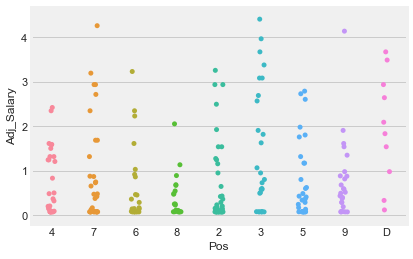

In [725]:
sns.stripplot(x="Pos", y="Adj_Salary", data=batters_only)

In [726]:
batters_only = pd.get_dummies(data=batters_only, columns=['Pos'], drop_first=True)

In [727]:
batters_only.head()

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,HR,RBI,...,rootASC,Salary,Pos_3,Pos_4,Pos_5,Pos_6,Pos_7,Pos_8,Pos_9,Pos_D
Player_Name,,,,,,,,,,,,,,,,,,,,,
Ian Kinsler,338.0,150.714286,680.142857,613.857143,101.714286,165.428571,33.714286,4.142857,20.285714,74.428571,...,1.414214,11000000.0,0,1,0,0,0,0,0,0
DJ LeMahieu,210.0,118.142857,459.714286,416.000000,58.714286,125.571429,18.714286,4.142857,4.857143,41.000000,...,1.414214,8500000.0,0,1,0,0,0,0,0,0
Cameron Maybin,139.0,106.000000,407.714286,367.714286,53.285714,94.428571,15.714286,3.714286,6.142857,34.571429,...,0.000000,3250000.0,0,0,0,0,1,0,0,0
Manny Machado,545.0,127.333333,560.833333,514.666667,73.000000,143.666667,29.333333,1.500000,23.000000,67.666667,...,1.732051,16000000.0,0,0,0,1,0,0,0,0
Carlos Asuaje,141.0,48.000000,184.000000,165.500000,15.000000,44.000000,8.000000,0.500000,2.000000,11.500000,...,0.000000,550100.0,0,1,0,0,0,0,0,0


In [728]:
batters_only['DH'] = batters_only['Pos_D']
batters_only['First_Base'] = batters_only['Pos_3']
batters_only['Second_Base'] = batters_only['Pos_4']
batters_only['Third_Base'] = batters_only['Pos_5']
batters_only['Shortstop'] = batters_only['Pos_6']
batters_only['Left_Field'] = batters_only['Pos_7']
batters_only['Center_Field'] = batters_only['Pos_8']
batters_only['Right_Field'] = batters_only['Pos_9']

batters_only = batters_only.drop(['Pos_3','Pos_4','Pos_5','Pos_6','Pos_7','Pos_8','Pos_9','Pos_D'],1)

batters_only

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,HR,RBI,...,rootASC,Salary,DH,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field
Player_Name,,,,,,,,,,,,,,,,,,,,,
Ian Kinsler,338.0,150.714286,680.142857,613.857143,101.714286,165.428571,33.714286,4.142857,20.285714,74.428571,...,1.414214,11000000.0,0,0,1,0,0,0,0,0
DJ LeMahieu,210.0,118.142857,459.714286,416.000000,58.714286,125.571429,18.714286,4.142857,4.857143,41.000000,...,1.414214,8500000.0,0,0,1,0,0,0,0,0
Cameron Maybin,139.0,106.000000,407.714286,367.714286,53.285714,94.428571,15.714286,3.714286,6.142857,34.571429,...,0.000000,3250000.0,0,0,0,0,0,1,0,0
Manny Machado,545.0,127.333333,560.833333,514.666667,73.000000,143.666667,29.333333,1.500000,23.000000,67.666667,...,1.732051,16000000.0,0,0,0,0,1,0,0,0
Carlos Asuaje,141.0,48.000000,184.000000,165.500000,15.000000,44.000000,8.000000,0.500000,2.000000,11.500000,...,0.000000,550100.0,0,0,1,0,0,0,0,0
Ozzie Albies,648.0,57.000000,244.000000,217.000000,34.000000,62.000000,9.000000,5.000000,6.000000,28.000000,...,0.000000,555000.0,0,0,1,0,0,0,0,0
Kike Hernandez,500.0,91.750000,234.500000,209.000000,27.000000,49.250000,12.500000,1.750000,7.000000,22.750000,...,0.000000,1600000.0,0,0,0,0,0,0,1,0
Francisco Cervelli,296.0,60.571429,224.142857,195.000000,25.285714,53.714286,8.857143,1.285714,3.142857,21.428571,...,0.000000,10500000.0,0,0,0,0,0,0,0,0
Tommy Pham,762.0,66.000000,222.000000,189.500000,37.250000,53.250000,9.000000,1.750000,9.250000,27.000000,...,0.000000,570100.0,0,0,0,0,0,0,1,0


In [729]:
batters_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 241 entries, Ian Kinsler to Pat Valaika
Data columns (total 36 columns):
index                 241 non-null float64
Games_Played          241 non-null float64
Plate_Appearances     241 non-null float64
At_Bats               241 non-null float64
Runs                  241 non-null float64
Hits                  241 non-null float64
Doubles               241 non-null float64
Triples               241 non-null float64
HR                    241 non-null float64
RBI                   241 non-null float64
BA                    241 non-null float64
OBP                   241 non-null float64
SLG                   241 non-null float64
OPS                   241 non-null float64
SB                    241 non-null float64
BB                    241 non-null float64
SO                    241 non-null float64
TB                    241 non-null float64
HBP                   241 non-null float64
SF                    241 non-null float64
dWAR                  

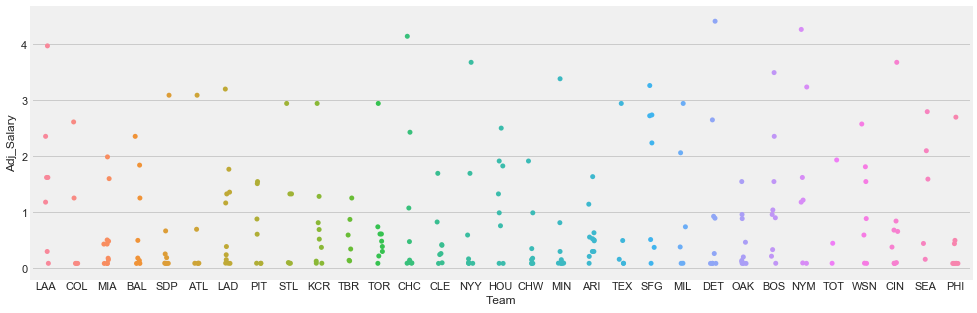

In [730]:
fig, ax = plt.subplots(figsize=(15,5))
sns.stripplot(x="Team", y="Adj_Salary", data=batters_only, ax=ax)

In [731]:
salary_df = batters_only.sort_values(by='Salary', ascending=False)
salary_df[:10]

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,HR,RBI,...,rootASC,Salary,DH,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field
Player_Name,,,,,,,,,,,,,,,,,,,,,
Miguel Cabrera,599.0,148.000000,634.428571,550.428571,90.000000,176.571429,35.285714,0.571429,30.714286,104.857143,...,2.449490,30000000.0,0,1,0,0,0,0,0,0
Yoenis Cespedes,829.0,131.333333,549.833333,503.166667,75.333333,138.000000,27.666667,4.000000,25.666667,82.500000,...,1.414214,29000000.0,0,0,0,0,0,1,0,0
Jason Heyward,377.0,137.285714,554.142857,492.428571,69.000000,127.714286,24.428571,3.000000,13.857143,55.428571,...,0.000000,28166667.0,0,0,0,0,0,0,0,1
Albert Pujols,34.0,145.285714,629.428571,571.142857,76.714286,152.571429,27.571429,0.142857,29.428571,98.285714,...,1.000000,27000000.0,0,1,0,0,0,0,0,0
Joey Votto,417.0,139.142857,610.142857,490.571429,85.000000,153.571429,33.000000,1.571429,23.857143,76.000000,...,2.000000,25000000.0,0,1,0,0,0,0,0,0
Giancarlo Stanton,312.0,126.571429,532.000000,459.714286,75.857143,123.857143,25.857143,1.285714,35.000000,87.571429,...,2.000000,25000000.0,1,0,0,0,0,0,0,0
J.D. Martinez,342.0,110.285714,445.428571,404.000000,55.857143,115.000000,24.000000,1.857143,21.714286,68.000000,...,1.000000,23750000.0,1,0,0,0,0,0,0,0
Joe Mauer,411.0,127.857143,548.428571,478.857143,63.857143,139.285714,28.571429,1.857143,8.000000,57.571429,...,1.414214,23000000.0,0,1,0,0,0,0,0,0
Buster Posey,134.0,132.000000,542.857143,478.428571,63.714286,148.142857,28.714286,0.857143,15.714286,75.285714,...,2.236068,22177778.0,0,0,0,0,0,0,0,0


In [732]:
batters_only_df = batters_only[['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
                                'OPS', 'SB', 'TB', 'SF', 'Age', 'Total_games_played',
                                'dWAR','All_star_count','First_Base','Second_Base','Third_Base',
                                'Shortstop','Left_Field','Center_Field','Right_Field','DH','Team','Salary']]

([<matplotlib.axis.YTick at 0x1c1d077278>,
 <a list of 7 Text yticklabel objects>)

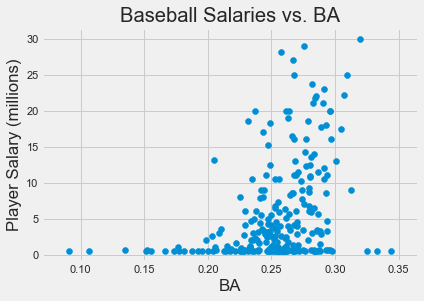

In [733]:
import matplotlib.style as style
style.use('fivethirtyeight')

y_ticks = [0, .5e7, 1e7, 1.5e7, 2e7, 2.5e7, 3e7]
salaries = ['0', '5', '10', '15','20','25','30']

plt.scatter(batters_only_df['BA'], batters_only_df['Salary'])
plt.title('Baseball Salaries vs. BA')
plt.ylabel('Player Salary (millions)')
plt.xlabel('BA');
plt.yticks(y_ticks, salaries)

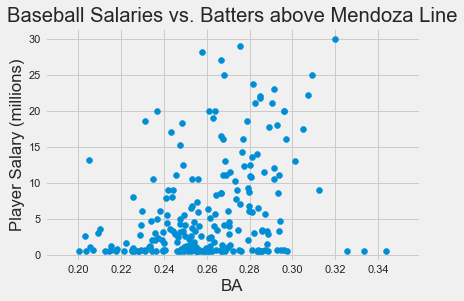

In [734]:
## Remove players below Mendoza line

batters_only_df = batters_only_df[batters_only_df['BA'] > 0.2]

y_ticks = [0, .5e7, 1e7, 1.5e7, 2e7, 2.5e7, 3e7]
salaries = ['0', '5', '10', '15','20','25','30']

plt.scatter(batters_only_df['BA'], batters_only_df['Salary'])
plt.title('Baseball Salaries vs. Batters above Mendoza Line')
plt.ylabel('Player Salary (millions)')
plt.xlabel('BA')
plt.yticks(y_ticks, salaries);

In [735]:
no_categorical = batters_only_df[['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI',
                                  'BA', 'OBP', 'SLG', 'OPS', 'SB', 'TB', 'SF', 'Salary',
                                  'Age', 'Total_games_played', 'dWAR', 'All_star_count']]

In [736]:
batters_only_df

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,Team,Salary
Player_Name,,,,,,,,,,,,,,,,,,,,,
Ian Kinsler,101.714286,165.428571,33.714286,4.142857,20.285714,74.428571,0.269097,0.333492,0.436634,0.770126,...,0,1,0,0,0,0,0,0,LAA,11000000.0
DJ LeMahieu,58.714286,125.571429,18.714286,4.142857,4.857143,41.000000,0.293349,0.338396,0.385015,0.723411,...,0,1,0,0,0,0,0,0,COL,8500000.0
Cameron Maybin,53.285714,94.428571,15.714286,3.714286,6.142857,34.571429,0.244065,0.311423,0.351670,0.663093,...,0,0,0,0,1,0,0,0,MIA,3250000.0
Manny Machado,73.000000,143.666667,29.333333,1.500000,23.000000,67.666667,0.276974,0.323903,0.469102,0.793005,...,0,0,0,1,0,0,0,0,BAL,16000000.0
Carlos Asuaje,15.000000,44.000000,8.000000,0.500000,2.000000,11.500000,0.239346,0.287160,0.326615,0.613775,...,0,1,0,0,0,0,0,0,SDP,550100.0
Ozzie Albies,34.000000,62.000000,9.000000,5.000000,6.000000,28.000000,0.285714,0.353909,0.456221,0.810131,...,0,1,0,0,0,0,0,0,ATL,555000.0
Kike Hernandez,27.000000,49.250000,12.500000,1.750000,7.000000,22.750000,0.240042,0.314306,0.414134,0.728440,...,0,0,0,0,0,1,0,0,LAD,1600000.0
Francisco Cervelli,25.285714,53.714286,8.857143,1.285714,3.142857,21.428571,0.234927,0.379887,0.345699,0.725587,...,0,0,0,0,0,0,0,0,PIT,10500000.0
Tommy Pham,37.250000,53.250000,9.000000,1.750000,9.250000,27.000000,0.200174,0.270495,0.359412,0.629907,...,0,0,0,0,0,1,0,0,STL,570100.0


In [737]:
#sns.pairplot(batters_only_df, size=1.2, aspect=1.5)

In [738]:
## NO ARIZONA FOR NOW

categorical_data = batters_only_df[['First_Base','Second_Base','Third_Base','Shortstop',
                                    'Left_Field', 'Right_Field','Center_Field','DH','Team']]

categorical_data

,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Right_Field,Center_Field,DH,Team
Player_Name,,,,,,,,,
Ian Kinsler,0,1,0,0,0,0,0,0,LAA
DJ LeMahieu,0,1,0,0,0,0,0,0,COL
Cameron Maybin,0,0,0,0,1,0,0,0,MIA
Manny Machado,0,0,0,1,0,0,0,0,BAL
Carlos Asuaje,0,1,0,0,0,0,0,0,SDP
Ozzie Albies,0,1,0,0,0,0,0,0,ATL
Kike Hernandez,0,0,0,0,0,0,1,0,LAD
Francisco Cervelli,0,0,0,0,0,0,0,0,PIT
Tommy Pham,0,0,0,0,0,0,1,0,STL


In [739]:
## FROM BEFORE!!1

#y = norm_batters.log_salary
#X = norm_batters.drop(['log_salary','Salary'],1)
#X_train, X_FINALTEST, y_train, y_FINALTEST = train_test_split(X, y, test_size=0.3, random_state=55)

In [740]:
training_df = batters_only_df.copy(deep=True)

In [741]:
#training_df.drop(columns='index', inplace=True)

training_df

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,Team,Salary
Player_Name,,,,,,,,,,,,,,,,,,,,,
Ian Kinsler,101.714286,165.428571,33.714286,4.142857,20.285714,74.428571,0.269097,0.333492,0.436634,0.770126,...,0,1,0,0,0,0,0,0,LAA,11000000.0
DJ LeMahieu,58.714286,125.571429,18.714286,4.142857,4.857143,41.000000,0.293349,0.338396,0.385015,0.723411,...,0,1,0,0,0,0,0,0,COL,8500000.0
Cameron Maybin,53.285714,94.428571,15.714286,3.714286,6.142857,34.571429,0.244065,0.311423,0.351670,0.663093,...,0,0,0,0,1,0,0,0,MIA,3250000.0
Manny Machado,73.000000,143.666667,29.333333,1.500000,23.000000,67.666667,0.276974,0.323903,0.469102,0.793005,...,0,0,0,1,0,0,0,0,BAL,16000000.0
Carlos Asuaje,15.000000,44.000000,8.000000,0.500000,2.000000,11.500000,0.239346,0.287160,0.326615,0.613775,...,0,1,0,0,0,0,0,0,SDP,550100.0
Ozzie Albies,34.000000,62.000000,9.000000,5.000000,6.000000,28.000000,0.285714,0.353909,0.456221,0.810131,...,0,1,0,0,0,0,0,0,ATL,555000.0
Kike Hernandez,27.000000,49.250000,12.500000,1.750000,7.000000,22.750000,0.240042,0.314306,0.414134,0.728440,...,0,0,0,0,0,1,0,0,LAD,1600000.0
Francisco Cervelli,25.285714,53.714286,8.857143,1.285714,3.142857,21.428571,0.234927,0.379887,0.345699,0.725587,...,0,0,0,0,0,0,0,0,PIT,10500000.0
Tommy Pham,37.250000,53.250000,9.000000,1.750000,9.250000,27.000000,0.200174,0.270495,0.359412,0.629907,...,0,0,0,0,0,1,0,0,STL,570100.0


In [742]:
training_df.describe()

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,All_star_count,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,Salary
count,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,...,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,226.000000,2.260000e+02
mean,45.385841,88.421776,17.744901,2.022693,11.567067,43.236157,0.260000,0.323883,0.423666,0.747549,...,0.734513,0.119469,0.123894,0.128319,0.115044,0.137168,0.084071,0.110619,0.044248,6.070280e+06
std,22.866582,43.069906,8.978955,1.617336,8.212146,24.086170,0.025483,0.030231,0.066422,0.085131,...,1.229401,0.325060,0.330192,0.335187,0.319784,0.344788,0.278110,0.314357,0.206102,7.009094e+06
min,1.000000,3.500000,0.000000,0.000000,0.000000,1.250000,0.200174,0.254814,0.285281,0.541724,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.450000e+05
25%,26.500000,54.083333,10.196429,0.666667,4.517857,23.000000,0.243438,0.304979,0.382533,0.693380,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.912500e+05
50%,46.071429,90.357143,18.000000,1.714286,10.100000,42.250000,0.259871,0.322929,0.421881,0.747727,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.162500e+06
75%,62.125000,122.071429,24.250000,3.107143,16.642857,59.857143,0.279516,0.342661,0.458274,0.789498,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000e+06
max,101.714286,181.500000,38.714286,6.750000,39.000000,104.857143,0.343750,0.454545,0.777778,1.232323,...,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000e+07


In [743]:
training_df.columns

Index(['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
       'OPS', 'SB', 'TB', 'SF', 'Age', 'Total_games_played', 'dWAR',
       'All_star_count', 'First_Base', 'Second_Base', 'Third_Base',
       'Shortstop', 'Left_Field', 'Center_Field', 'Right_Field', 'DH', 'Team',
       'Salary'],
      dtype='object')

In [744]:
#y_train = pd.DataFrame(y_train)

In [745]:
#y_train.reset_index(inplace=True)

#y_train

In [746]:
## CREATE FULL TRAINING DATASET

#training_df.reset_index(inplace=True)

#training_df = pd.merge(training_df, y_train)

#training_df = training_df.set_index('Player_Name')

In [747]:
training_df

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,Team,Salary
Player_Name,,,,,,,,,,,,,,,,,,,,,
Ian Kinsler,101.714286,165.428571,33.714286,4.142857,20.285714,74.428571,0.269097,0.333492,0.436634,0.770126,...,0,1,0,0,0,0,0,0,LAA,11000000.0
DJ LeMahieu,58.714286,125.571429,18.714286,4.142857,4.857143,41.000000,0.293349,0.338396,0.385015,0.723411,...,0,1,0,0,0,0,0,0,COL,8500000.0
Cameron Maybin,53.285714,94.428571,15.714286,3.714286,6.142857,34.571429,0.244065,0.311423,0.351670,0.663093,...,0,0,0,0,1,0,0,0,MIA,3250000.0
Manny Machado,73.000000,143.666667,29.333333,1.500000,23.000000,67.666667,0.276974,0.323903,0.469102,0.793005,...,0,0,0,1,0,0,0,0,BAL,16000000.0
Carlos Asuaje,15.000000,44.000000,8.000000,0.500000,2.000000,11.500000,0.239346,0.287160,0.326615,0.613775,...,0,1,0,0,0,0,0,0,SDP,550100.0
Ozzie Albies,34.000000,62.000000,9.000000,5.000000,6.000000,28.000000,0.285714,0.353909,0.456221,0.810131,...,0,1,0,0,0,0,0,0,ATL,555000.0
Kike Hernandez,27.000000,49.250000,12.500000,1.750000,7.000000,22.750000,0.240042,0.314306,0.414134,0.728440,...,0,0,0,0,0,1,0,0,LAD,1600000.0
Francisco Cervelli,25.285714,53.714286,8.857143,1.285714,3.142857,21.428571,0.234927,0.379887,0.345699,0.725587,...,0,0,0,0,0,0,0,0,PIT,10500000.0
Tommy Pham,37.250000,53.250000,9.000000,1.750000,9.250000,27.000000,0.200174,0.270495,0.359412,0.629907,...,0,0,0,0,0,1,0,0,STL,570100.0


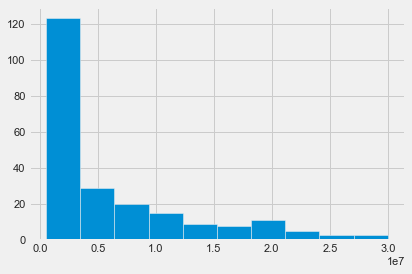

In [748]:
training_df.Salary.hist()

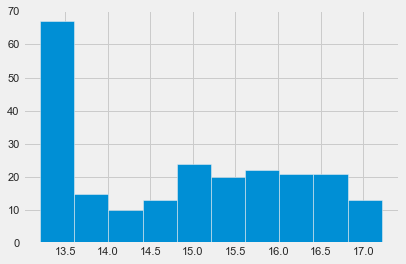

In [749]:
training_df['log_salary'] = np.log(training_df.Salary)

training_df.log_salary.hist()

In [750]:
from scipy import stats

y_transformed, _ = stats.boxcox(training_df.Salary)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:900: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1929: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)


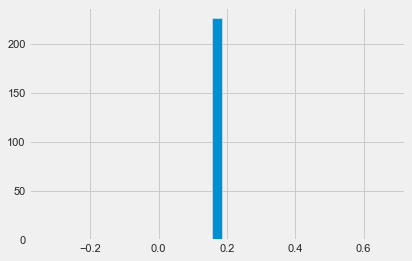

In [751]:
pd.Series(y_transformed).hist(bins=35)

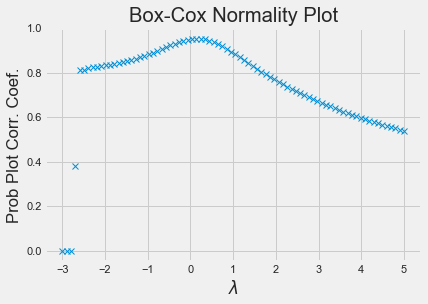

In [752]:
fig = plt.figure()
ax = fig.add_subplot(111)
prob = stats.boxcox_normplot(training_df.Salary, -3, 5, plot=ax)

0.1478435899990076


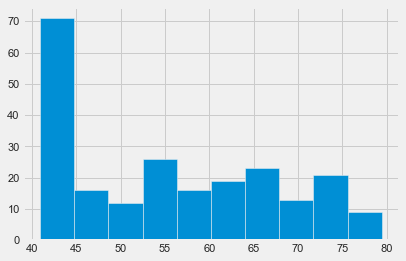

In [753]:
lamb=stats.boxcox_normmax(training_df.Salary, brack=(-1.9, 1.9))
print(lamb)
training_df['y_t']=(np.power(training_df.Salary,lamb)-1)/lamb

plt.hist(training_df['y_t']);

In [754]:
training_df.loc[:,'rootASC'] = training_df.loc[:,'All_star_count'] ** 0.5

In [755]:
training_df.corr()

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,Salary,log_salary,y_t,rootASC
Runs,1.000000,0.952173,0.923689,0.534445,0.778922,0.898578,0.350185,0.409411,0.302935,0.381748,...,-0.026200,-0.022210,0.038493,0.018653,0.026555,0.115282,0.633339,0.686888,0.689389,0.648360
Hits,0.952173,1.000000,0.953319,0.518894,0.695744,0.887244,0.439449,0.372047,0.236696,0.316797,...,-0.003374,0.012330,-0.015730,-0.037018,-0.010905,0.112292,0.677503,0.749587,0.750221,0.665536
Doubles,0.923689,0.953319,1.000000,0.438279,0.722164,0.892131,0.401839,0.364893,0.296375,0.360820,...,0.035607,-0.028224,-0.004203,-0.058884,0.008805,0.092906,0.654519,0.719231,0.720490,0.650526
Triples,0.534445,0.518894,0.438279,1.000000,0.156718,0.301317,0.257260,0.083197,0.002540,0.031526,...,-0.076292,0.145599,0.113319,0.168163,0.060312,-0.107120,0.136890,0.243669,0.230576,0.175120
HR,0.778922,0.695744,0.722164,0.156718,1.000000,0.920733,0.146941,0.295741,0.552852,0.536374,...,0.046325,-0.144090,0.075979,-0.128567,0.014645,0.284094,0.542484,0.535465,0.545644,0.562779
RBI,0.898578,0.887244,0.892131,0.301317,0.920733,1.000000,0.304571,0.369451,0.436678,0.471908,...,0.042297,-0.088507,0.026379,-0.125406,0.000203,0.215143,0.675455,0.692217,0.701015,0.661079
BA,0.350185,0.439449,0.401839,0.257260,0.146941,0.304571,1.000000,0.614734,0.526902,0.629407,...,0.040825,-0.053416,-0.055458,-0.045847,-0.048196,0.013914,0.341884,0.285767,0.300991,0.350417
OBP,0.409411,0.372047,0.364893,0.083197,0.295741,0.369451,0.614734,1.000000,0.478454,0.728421,...,-0.018528,-0.083495,-0.023447,-0.080758,-0.033862,0.040363,0.384568,0.300148,0.319577,0.367322
SLG,0.302935,0.236696,0.296375,0.002540,0.552852,0.436678,0.526902,0.478454,1.000000,0.950137,...,0.095717,-0.185062,0.069457,-0.101507,0.006337,0.213761,0.237634,0.142038,0.161724,0.280624
OPS,0.381748,0.316797,0.360820,0.031526,0.536374,0.471908,0.629407,0.728421,0.950137,1.000000,...,0.068102,-0.174042,0.045866,-0.107877,-0.007080,0.181116,0.321976,0.217410,0.239669,0.349394


In [756]:
training_df['Team'].unique()

array(['LAA', 'COL', 'MIA', 'BAL', 'SDP', 'ATL', 'LAD', 'PIT', 'STL',
       'KCR', 'TBR', 'TOR', 'CHC', 'CLE', 'NYY', 'HOU', 'CHW', 'MIN',
       'ARI', 'TEX', 'SFG', 'MIL', 'DET', 'OAK', 'BOS', 'NYM', 'TOT',
       'WSN', 'CIN', 'SEA', 'PHI'], dtype=object)

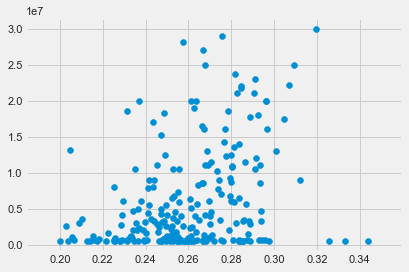

In [757]:
plt.scatter(training_df['BA'], training_df['Salary'])

In [758]:
#sns.pairplot(batters_only_df, size=1.2, aspect=1.5)

In [759]:
training_df

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,Shortstop,Left_Field,Center_Field,Right_Field,DH,Team,Salary,log_salary,y_t,rootASC
Player_Name,,,,,,,,,,,,,,,,,,,,,
Ian Kinsler,101.714286,165.428571,33.714286,4.142857,20.285714,74.428571,0.269097,0.333492,0.436634,0.770126,...,0,0,0,0,0,LAA,11000000.0,16.213406,67.576046,1.414214
DJ LeMahieu,58.714286,125.571429,18.714286,4.142857,4.857143,41.000000,0.293349,0.338396,0.385015,0.723411,...,0,0,0,0,0,COL,8500000.0,15.955577,64.795657,1.414214
Cameron Maybin,53.285714,94.428571,15.714286,3.714286,6.142857,34.571429,0.244065,0.311423,0.351670,0.663093,...,0,1,0,0,0,MIA,3250000.0,14.994166,55.314095,0.000000
Manny Machado,73.000000,143.666667,29.333333,1.500000,23.000000,67.666667,0.276974,0.323903,0.469102,0.793005,...,1,0,0,0,0,BAL,16000000.0,16.588099,71.810384,1.732051
Carlos Asuaje,15.000000,44.000000,8.000000,0.500000,2.000000,11.500000,0.239346,0.287160,0.326615,0.613775,...,0,0,0,0,0,SDP,550100.0,13.217855,40.976379,0.000000
Ozzie Albies,34.000000,62.000000,9.000000,5.000000,6.000000,28.000000,0.285714,0.353909,0.456221,0.810131,...,0,0,0,0,0,ATL,555000.0,13.226723,41.039012,0.000000
Kike Hernandez,27.000000,49.250000,12.500000,1.750000,7.000000,22.750000,0.240042,0.314306,0.414134,0.728440,...,0,0,1,0,0,LAD,1600000.0,14.285514,49.139321,0.000000
Francisco Cervelli,25.285714,53.714286,8.857143,1.285714,3.142857,21.428571,0.234927,0.379887,0.345699,0.725587,...,0,0,0,0,0,PIT,10500000.0,16.166886,67.066514,0.000000
Tommy Pham,37.250000,53.250000,9.000000,1.750000,9.250000,27.000000,0.200174,0.270495,0.359412,0.629907,...,0,0,1,0,0,STL,570100.0,13.253567,41.229102,0.000000


In [760]:
training_df.corr()

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,Salary,log_salary,y_t,rootASC
Runs,1.000000,0.952173,0.923689,0.534445,0.778922,0.898578,0.350185,0.409411,0.302935,0.381748,...,-0.026200,-0.022210,0.038493,0.018653,0.026555,0.115282,0.633339,0.686888,0.689389,0.648360
Hits,0.952173,1.000000,0.953319,0.518894,0.695744,0.887244,0.439449,0.372047,0.236696,0.316797,...,-0.003374,0.012330,-0.015730,-0.037018,-0.010905,0.112292,0.677503,0.749587,0.750221,0.665536
Doubles,0.923689,0.953319,1.000000,0.438279,0.722164,0.892131,0.401839,0.364893,0.296375,0.360820,...,0.035607,-0.028224,-0.004203,-0.058884,0.008805,0.092906,0.654519,0.719231,0.720490,0.650526
Triples,0.534445,0.518894,0.438279,1.000000,0.156718,0.301317,0.257260,0.083197,0.002540,0.031526,...,-0.076292,0.145599,0.113319,0.168163,0.060312,-0.107120,0.136890,0.243669,0.230576,0.175120
HR,0.778922,0.695744,0.722164,0.156718,1.000000,0.920733,0.146941,0.295741,0.552852,0.536374,...,0.046325,-0.144090,0.075979,-0.128567,0.014645,0.284094,0.542484,0.535465,0.545644,0.562779
RBI,0.898578,0.887244,0.892131,0.301317,0.920733,1.000000,0.304571,0.369451,0.436678,0.471908,...,0.042297,-0.088507,0.026379,-0.125406,0.000203,0.215143,0.675455,0.692217,0.701015,0.661079
BA,0.350185,0.439449,0.401839,0.257260,0.146941,0.304571,1.000000,0.614734,0.526902,0.629407,...,0.040825,-0.053416,-0.055458,-0.045847,-0.048196,0.013914,0.341884,0.285767,0.300991,0.350417
OBP,0.409411,0.372047,0.364893,0.083197,0.295741,0.369451,0.614734,1.000000,0.478454,0.728421,...,-0.018528,-0.083495,-0.023447,-0.080758,-0.033862,0.040363,0.384568,0.300148,0.319577,0.367322
SLG,0.302935,0.236696,0.296375,0.002540,0.552852,0.436678,0.526902,0.478454,1.000000,0.950137,...,0.095717,-0.185062,0.069457,-0.101507,0.006337,0.213761,0.237634,0.142038,0.161724,0.280624
OPS,0.381748,0.316797,0.360820,0.031526,0.536374,0.471908,0.629407,0.728421,0.950137,1.000000,...,0.068102,-0.174042,0.045866,-0.107877,-0.007080,0.181116,0.321976,0.217410,0.239669,0.349394


In [761]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, Ian Kinsler to Pat Valaika
Data columns (total 30 columns):
Runs                  226 non-null float64
Hits                  226 non-null float64
Doubles               226 non-null float64
Triples               226 non-null float64
HR                    226 non-null float64
RBI                   226 non-null float64
BA                    226 non-null float64
OBP                   226 non-null float64
SLG                   226 non-null float64
OPS                   226 non-null float64
SB                    226 non-null float64
TB                    226 non-null float64
SF                    226 non-null float64
Age                   226 non-null int64
Total_games_played    226 non-null int64
dWAR                  226 non-null float64
All_star_count        226 non-null float64
First_Base            226 non-null uint8
Second_Base           226 non-null uint8
Third_Base            226 non-null uint8
Shortstop             226 non-nu

In [762]:
training_df['y_t']

Player_Name
Ian Kinsler             67.576046
DJ LeMahieu             64.795657
Cameron Maybin          55.314095
Manny Machado           71.810384
Carlos Asuaje           40.976379
Ozzie Albies            41.039012
Kike Hernandez          49.139321
Francisco Cervelli      67.066514
Tommy Pham              41.229102
Lucas Duda              55.997985
Jesus Sucre             44.789020
Justin Smoak            57.541211
Javier Baez             42.246382
Rajai Davis             49.884888
Yangervis Solarte       57.541211
Cheslor Cuthbert        41.271312
Brett Gardner           68.066211
Max Stassi              41.065710
Nicky Delmonico         41.013505
Cory Spangenberg        49.642632
Ender Inciarte          58.793899
Chance Sisco            40.930060
Joc Pederson            53.299533
Ian Happ                41.227858
Logan Forsythe          65.402933
Robbie Grossman         51.014347
Mike Moustakas          60.335229
Daniel Descalso         51.014347
Marwin Gonzalez         59.638335
Ju

In [763]:
X_train = training_df.drop(['Salary', 'log_salary', 'y_t'], axis=1)
y_train = training_df['y_t']

In [764]:
X_train.columns

Index(['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
       'OPS', 'SB', 'TB', 'SF', 'Age', 'Total_games_played', 'dWAR',
       'All_star_count', 'First_Base', 'Second_Base', 'Third_Base',
       'Shortstop', 'Left_Field', 'Center_Field', 'Right_Field', 'DH', 'Team',
       'rootASC'],
      dtype='object')

In [765]:
## NORMALIZE NON-CATEGORICAL VALUES

In [766]:
ssX = StandardScaler()
X_train_scalable = X_train.filter(['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI',
                                  'BA', 'OBP', 'SLG', 'OPS', 'SB', 'TB', 'SF',
                                  'Age', 'Total_games_played', 'dWAR', 'All_star_count', 'rootASC'], axis=1)
X_train_scaled_columns = pd.DataFrame(ssX.fit_transform(X_train_scalable), columns = ['Runs_Scaled', 'Hits_Scaled',
                                'Doubles_Scaled','Triples_Scaled', 'HR_Scaled', 'RBI_Scaled', 'BA_Scaled', 'OBP_Scaled',
                                'SLG_Scaled', 'OPS_Scaled', 'SB_Scaled', 'TB_Scaled', 'SF_Scaled',
                                  'Age_Scaled', 'Total_games_played_Scaled', 'dWAR_Scaled', 'All_star_count_Scaled', 'rootASC_Scaled'])

X_train.reset_index(inplace=True)
X_train = X_train.join(X_train_scaled_columns)
X_train = X_train.drop(['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI',
                                  'BA', 'OBP', 'SLG', 'OPS', 'SB', 'TB', 'SF',
                                  'Age', 'Total_games_played', 'dWAR', 'All_star_count','Team', 'rootASC'],1)

X_train = X_train.set_index('Player_Name')

X_test_scalable = X_FINALTEST.filter(['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI',
                                  'BA', 'OBP', 'SLG', 'OPS', 'SB', 'TB', 'SF',
                                  'Age', 'Total_games_played', 'dWAR', 'All_star_count', 'rootASC'], axis=1)
X_test_scaled_columns = pd.DataFrame(ssX.transform(X_test_scalable), columns = ['Runs_Scaled', 'Hits_Scaled',
                                'Doubles_Scaled','Triples_Scaled', 'HR_Scaled', 'RBI_Scaled', 'BA_Scaled', 'OBP_Scaled',
                                'SLG_Scaled', 'OPS_Scaled', 'SB_Scaled', 'TB_Scaled', 'SF_Scaled',
                                  'Age_Scaled', 'Total_games_played_Scaled', 'dWAR_Scaled', 'All_star_count_Scaled', 'rootASC_Scaled'])

X_FINALTEST.reset_index(inplace=True)
X_FINALTEST = X_FINALTEST.join(X_test_scaled_columns)
X_FINALTEST = X_FINALTEST.drop(['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI',
                                  'BA', 'OBP', 'SLG', 'OPS', 'SB', 'TB', 'SF',
                                  'Age', 'Total_games_played', 'dWAR', 'All_star_count','Team', 'rootASC'],1)

X_FINALTEST = X_FINALTEST.set_index('Player_Name')

In [767]:
X_train.head()

,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,Runs_Scaled,Hits_Scaled,...,SLG_Scaled,OPS_Scaled,SB_Scaled,TB_Scaled,SF_Scaled,Age_Scaled,Total_games_played_Scaled,dWAR_Scaled,All_star_count_Scaled,rootASC_Scaled
Player_Name,,,,,,,,,,,,,,,,,,,,,
Ian Kinsler,0,1,0,0,0,0,0,0,2.468820,1.791918,...,0.195665,0.265790,1.437185,1.701400,0.859946,2.039567,1.743818,2.112718,1.031638,1.313179
DJ LeMahieu,0,1,0,0,0,0,0,0,0.584173,0.864458,...,-0.583192,-0.284168,0.480551,0.306563,0.216106,0.079303,1.024041,1.213616,1.031638,1.313179
Cameron Maybin,0,0,0,0,1,0,0,0,0.346244,0.139776,...,-1.086341,-0.994277,1.934635,-0.122921,-0.611689,0.639378,0.755704,-0.078844,-0.598783,-0.724521
Manny Machado,0,0,0,1,0,0,0,0,1.210301,1.285527,...,0.685575,0.535144,0.030933,1.380272,0.951924,-1.040848,0.825156,2.281300,1.846848,1.771142
Carlos Asuaje,0,1,0,0,0,0,0,0,-1.331781,-1.033677,...,-1.464381,-1.574886,-0.839605,-1.184809,-1.301518,-0.760811,-1.283663,-0.341082,-0.598783,-0.724521


In [768]:
X_FINALTEST.head()

,index,Games_Played,Plate_Appearances,At_Bats,BB,SO,HBP,Adj_Salary,Pos,Runs_Scaled,...,SLG_Scaled,OPS_Scaled,SB_Scaled,TB_Scaled,SF_Scaled,Age_Scaled,Total_games_played_Scaled,dWAR_Scaled,All_star_count_Scaled,rootASC_Scaled
Player_Name,,,,,,,,,,,,,,,,,,,,,
Ryan Rua,702.0,54.500000,152.000000,139.250000,10.000000,44.500000,2.000000,0.127812,7,-1.134551,...,-0.545811,-0.805350,-0.437818,-1.253763,-1.301518,-0.200735,-0.898519,-0.406642,-0.598783,-0.724521
Steve Pearce,741.0,75.142857,255.571429,225.857143,23.714286,50.571429,3.857143,0.918190,D,-0.711914,...,-0.010157,0.056736,-0.686543,-0.593777,-0.519712,1.759529,0.073810,-0.303620,-0.598783,-0.724521
Kyle Hendricks,512.0,24.250000,53.250000,48.000000,1.250000,23.000000,0.250000,0.613351,1,-1.912516,...,-4.696632,-5.845551,-0.839605,-1.926062,-1.623439,-0.200735,-1.280506,-0.209963,-0.598783,-0.724521
Kevin Kiermaier,495.0,92.600000,346.800000,316.400000,23.600000,67.800000,3.400000,0.832492,8,-0.165930,...,0.132496,0.063910,0.767541,-0.117404,-0.850830,-0.200735,-0.125075,2.936896,-0.598783,-0.724521
Andrew Benintendi,49.0,92.500000,388.000000,339.000000,40.000000,68.500000,3.500000,0.091158,7,0.202234,...,0.399414,0.681337,0.566648,0.021882,1.273844,-1.600924,-1.002697,-0.078844,-0.598783,-0.724521


In [769]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score

## THIS IS JUST USING DEFAULTS FOR EACH TYPE -- NEED TO TUNE HYPERPARAMETERS

X_temptrain, X_temptest, y_temptrain, y_temptest = train_test_split(X_train, y_train, test_size=0.3, random_state=4444)

models = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(),
           GradientBoostingRegressor()]
names = ['LinReg', 'SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosted Trees']

for i in range(len(models)):    
    models[i].fit(X_temptrain, y_temptrain)
    
    score = np.round(models[i].score(X_temptest, y_temptest), 4)
    # Make predictions using the testing set
    y_predict = models[i].predict(X_temptest)
    # The mean squared error
    rmse = np.round(mean_squared_error(y_temptest, y_predict)**0.5, 4)
    # Explained variance score: 1 is perfect prediction
    rsquared = np.round(r2_score(y_temptest, y_predict), 4)
    print(f'{names[i]} R^2_score: {score} RMSE: {rmse}')
    print('')

LinReg R^2_score: 0.7048 RMSE: 6.226

SVR R^2_score: 0.6533 RMSE: 6.7475

Decision Tree R^2_score: 0.5705 RMSE: 7.5104

Random Forest R^2_score: 0.6975 RMSE: 6.3028

Gradient Boosted Trees R^2_score: 0.7346 RMSE: 5.904



In [770]:
## Simple train-test-split

from sklearn.model_selection import GridSearchCV

models = [('Linear Regresion', LinearRegression),
          ('SVR', SVR),
          ('Decision Tree', DecisionTreeRegressor),
          ('Random Forest', RandomForestRegressor),
          ('Gradient Boosted Trees', GradientBoostingRegressor)
         ]

param_choices = [
    {},
    {
        'C': np.linspace(0.1,100,101)
    },
    {
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    },
    {
        'n_estimators': [50, 100, 200],
        'max_depth': [1,2,3,4,5],
        'min_samples_leaf': [3,6,10]
    }
]
        
grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_squared_error')
    grid.fit(X_temptrain, y_temptrain)
    y_pred = grid.predict(X_temptest)
    mse_score = -1.0*grid.score(X_temptest,y_temptest)
    rmse_score = np.sqrt(mse_score)
    s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}, rmse: {rmse_score}"
    print(s)
    grids[name] = grid

Linear Regresion: best score: -45.15200700041037, best estimator: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False), rmse: 6.225975326193166
SVR: best score: -43.267693311399555, best estimator: SVR(C=41.059000000000005, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto', kernel='rbf', max_iter=-1, shrinking=True, tol=0.001,
  verbose=False), rmse: 6.0905287191955
Decision Tree: best score: -45.21424145280994, best estimator: DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=6,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), rmse: 7.2884064133230835
Random Forest: best score: -34.5162694828346, best estimator: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
          

In [771]:
## USING KFOLD CROSS VALIDATION

models = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(),
           GradientBoostingRegressor()]
names = ['LinReg', 'SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosted Trees']

for i in range(len(models)):
    
    kf = KFold(n=len(X_train), random_state = 4444)
    rsquared = []
    rmse = []
    
    for train_index, test_index in kf:
        
        kX_train = X_train.iloc[train_index]
        kX_test = X_train.iloc[test_index]
        ky_train = y_train.iloc[train_index]
        ky_test = y_train.iloc[test_index]
        
        models[i].fit(kX_train, ky_train)
        y_predict = models[i].predict(kX_test)
        
        #R_squared score
        score = np.round(models[i].score(kX_test, ky_test), 4)
        # Make predictions using the testing set
        y_predict = models[i].predict(kX_test)
        # The mean squared error
        root_mse = np.round(np.sqrt(mean_squared_error(ky_test, y_predict)), 4)
        
        rsquared.append(score)
        rmse.append(root_mse)
        
    
    rsquared = np.round(np.mean(rsquared), 4)
    rmse = np.round(np.mean(rmse), 4)
    
    print('Scores with K-Fold CV')
    print(f'{names[i]} R^2 score: {rsquared} RMSE: {rmse}')
    print('')

Scores with K-Fold CV
LinReg R^2 score: 0.7152 RMSE: 6.4433

Scores with K-Fold CV
SVR R^2 score: 0.5679 RMSE: 7.942

Scores with K-Fold CV
Decision Tree R^2 score: 0.4994 RMSE: 8.5273

Scores with K-Fold CV
Random Forest R^2 score: 0.7562 RMSE: 5.9313

Scores with K-Fold CV
Gradient Boosted Trees R^2 score: 0.7624 RMSE: 5.8373



In [772]:
models = [('forest', RandomForestRegressor)]

param_choices = [{
        'n_estimators': [25,50, 100, 200],
        'max_depth': [1,2,3,4,5,7,10],
        'min_samples_leaf': [3,6,10]
    }]

grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_squared_error')
    grid.fit(X_train, y_train)
    mse_score = -1.0*grid.best_score_
    rmse_score = np.sqrt(mse_score)
    s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}, rmse: {rmse_score}"
    print(s)
    grids[name] = grid

forest: best score: -33.481855867950486, best estimator: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rmse: 5.786350824824787


In [773]:
rf = grid.best_estimator_
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [774]:
models = [('GBT', GradientBoostingRegressor)]

param_choices = [{
        'n_estimators': [25,50, 100, 200],
        'max_depth': [1,2,3,4,5,7,10],
        'min_samples_leaf': [3,6,10]
    }]

grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_squared_error')
    grid.fit(X_train, y_train)
    mse_score = -1.0*grid.best_score_
    rmse_score = np.sqrt(mse_score)
    s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}, rmse: {rmse_score}"
    print(s)
    grids[name] = grid

GBT: best score: -33.34562941831157, best estimator: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False), rmse: 5.774567465906998


In [775]:
gb = grid.best_estimator_
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [776]:
rf_residuals = np.linalg.norm(y_train - rf.predict(X_train)) ** 2

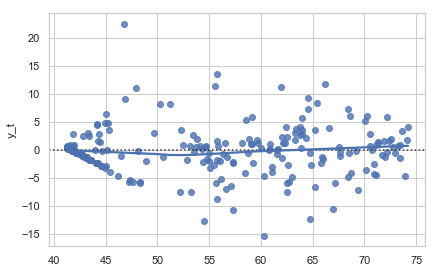

In [777]:
import seaborn as sns
sns.set(style="whitegrid")

y_predict = rf.predict(X_train)

# Plot the residuals after fitting a linear model
sns.residplot(y_predict, y_train, lowess=True, color="b")

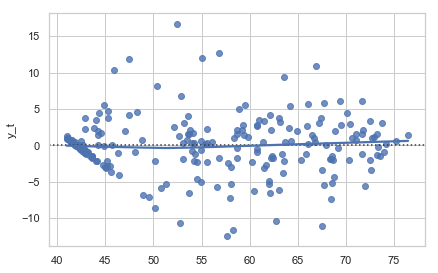

In [778]:
sns.set(style="whitegrid")

y_predict = gb.predict(X_train)

# Plot the residuals after fitting a linear model
sns.residplot(y_predict, y_train, lowess=True, color="b")

### Much better residual plot with Gradient Boosted Regressor

In [779]:
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='r2')
mse_scores = cross_val_score(rf, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
rmse = np.sqrt(-np.mean(mse_scores))

print("RF Scores")
print(np.mean(scores))
print(rmse)

RF Scores
0.7407009694084128
5.856964125038051


In [780]:
scores = cross_val_score(gb, X_train, y_train, cv=10, scoring='r2')
mse_scores = cross_val_score(gb, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
rmse = np.sqrt(-np.mean(mse_scores))

print("RF Scores")
print(np.mean(scores))
print(rmse)

RF Scores
0.7507414623613047
5.749652447644838


   train_size  train_score  test_score
0          16     0.150344   -0.027350
1          54     0.870120    0.701694
2          92     0.867301    0.727494
3         130     0.878624    0.742368
4         169     0.879170    0.762525


(-1, 1)

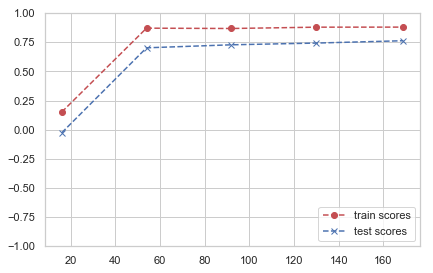

In [781]:
train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.legend(loc='lower right')
plt.ylim(-1,1)

   train_size  train_score  test_score
0          16     0.930867    0.519722
1          54     0.962963    0.708655
2          92     0.935878    0.724751
3         130     0.918434    0.749924
4         169     0.906061    0.757500


(-1, 1)

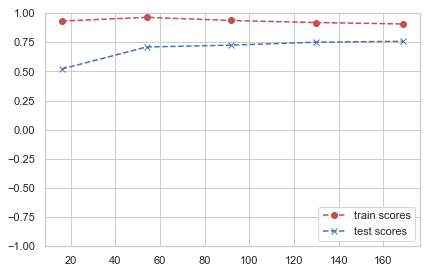

In [782]:
train_sizes, train_scores, test_scores = learning_curve(gb, X_train, y_train, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.legend(loc='lower right')
plt.ylim(-1,1)

In [783]:
X_train.columns

Index(['First_Base', 'Second_Base', 'Third_Base', 'Shortstop', 'Left_Field',
       'Center_Field', 'Right_Field', 'DH', 'Runs_Scaled', 'Hits_Scaled',
       'Doubles_Scaled', 'Triples_Scaled', 'HR_Scaled', 'RBI_Scaled',
       'BA_Scaled', 'OBP_Scaled', 'SLG_Scaled', 'OPS_Scaled', 'SB_Scaled',
       'TB_Scaled', 'SF_Scaled', 'Age_Scaled', 'Total_games_played_Scaled',
       'dWAR_Scaled', 'All_star_count_Scaled', 'rootASC_Scaled'],
      dtype='object')

In [784]:
def feature_selection(model, X, y, count):
    # RANDOM FOREST FEATURE IMPORTANCE
    model.fit(X, y)    
    importances = list(zip(model.feature_importances_, X.columns))
    importances.sort(reverse=True)
    RF_features = [x[1] for x in importances][0:count]
    weights = [x[0] for x in importances][0:count]
    
    feats = pd.DataFrame(
        {
         'Feature Importances': RF_features,
            'Weights': weights
        })
    
    return feats

In [785]:
feature_selection(rf, X_train, y_train, len(X_train.columns))

,Feature Importances,Weights
0,Total_games_played_Scaled,0.803645
1,Hits_Scaled,0.042562
2,Doubles_Scaled,0.031066
3,RBI_Scaled,0.029495
4,dWAR_Scaled,0.015558
5,Age_Scaled,0.012974
6,OPS_Scaled,0.010117
7,BA_Scaled,0.008197
8,TB_Scaled,0.007231
9,rootASC_Scaled,0.006750


In [786]:
feature_selection(gb, X_train, y_train, len(X_train.columns))

,Feature Importances,Weights
0,Total_games_played_Scaled,0.329546
1,Age_Scaled,0.215336
2,Hits_Scaled,0.059443
3,RBI_Scaled,0.058645
4,Triples_Scaled,0.049743
5,dWAR_Scaled,0.040697
6,SB_Scaled,0.034457
7,OBP_Scaled,0.033175
8,BA_Scaled,0.031150
9,SF_Scaled,0.029625


In [787]:
training_df.corr()

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,Salary,log_salary,y_t,rootASC
Runs,1.000000,0.952173,0.923689,0.534445,0.778922,0.898578,0.350185,0.409411,0.302935,0.381748,...,-0.026200,-0.022210,0.038493,0.018653,0.026555,0.115282,0.633339,0.686888,0.689389,0.648360
Hits,0.952173,1.000000,0.953319,0.518894,0.695744,0.887244,0.439449,0.372047,0.236696,0.316797,...,-0.003374,0.012330,-0.015730,-0.037018,-0.010905,0.112292,0.677503,0.749587,0.750221,0.665536
Doubles,0.923689,0.953319,1.000000,0.438279,0.722164,0.892131,0.401839,0.364893,0.296375,0.360820,...,0.035607,-0.028224,-0.004203,-0.058884,0.008805,0.092906,0.654519,0.719231,0.720490,0.650526
Triples,0.534445,0.518894,0.438279,1.000000,0.156718,0.301317,0.257260,0.083197,0.002540,0.031526,...,-0.076292,0.145599,0.113319,0.168163,0.060312,-0.107120,0.136890,0.243669,0.230576,0.175120
HR,0.778922,0.695744,0.722164,0.156718,1.000000,0.920733,0.146941,0.295741,0.552852,0.536374,...,0.046325,-0.144090,0.075979,-0.128567,0.014645,0.284094,0.542484,0.535465,0.545644,0.562779
RBI,0.898578,0.887244,0.892131,0.301317,0.920733,1.000000,0.304571,0.369451,0.436678,0.471908,...,0.042297,-0.088507,0.026379,-0.125406,0.000203,0.215143,0.675455,0.692217,0.701015,0.661079
BA,0.350185,0.439449,0.401839,0.257260,0.146941,0.304571,1.000000,0.614734,0.526902,0.629407,...,0.040825,-0.053416,-0.055458,-0.045847,-0.048196,0.013914,0.341884,0.285767,0.300991,0.350417
OBP,0.409411,0.372047,0.364893,0.083197,0.295741,0.369451,0.614734,1.000000,0.478454,0.728421,...,-0.018528,-0.083495,-0.023447,-0.080758,-0.033862,0.040363,0.384568,0.300148,0.319577,0.367322
SLG,0.302935,0.236696,0.296375,0.002540,0.552852,0.436678,0.526902,0.478454,1.000000,0.950137,...,0.095717,-0.185062,0.069457,-0.101507,0.006337,0.213761,0.237634,0.142038,0.161724,0.280624
OPS,0.381748,0.316797,0.360820,0.031526,0.536374,0.471908,0.629407,0.728421,0.950137,1.000000,...,0.068102,-0.174042,0.045866,-0.107877,-0.007080,0.181116,0.321976,0.217410,0.239669,0.349394


In [788]:
X_train.columns

Index(['First_Base', 'Second_Base', 'Third_Base', 'Shortstop', 'Left_Field',
       'Center_Field', 'Right_Field', 'DH', 'Runs_Scaled', 'Hits_Scaled',
       'Doubles_Scaled', 'Triples_Scaled', 'HR_Scaled', 'RBI_Scaled',
       'BA_Scaled', 'OBP_Scaled', 'SLG_Scaled', 'OPS_Scaled', 'SB_Scaled',
       'TB_Scaled', 'SF_Scaled', 'Age_Scaled', 'Total_games_played_Scaled',
       'dWAR_Scaled', 'All_star_count_Scaled', 'rootASC_Scaled'],
      dtype='object')

In [790]:
X = X_train[['First_Base', 'Second_Base', 'Third_Base', 'Shortstop', 'Left_Field',
       'Center_Field', 'Right_Field', 'DH', 'RBI_Scaled','OPS_Scaled',
       'TB_Scaled', 'Age_Scaled', 'Total_games_played_Scaled',
       'dWAR_Scaled', 'rootASC_Scaled']]
y = y_train

In [792]:
## USING KFOLD CROSS VALIDATION

models = [LinearRegression(), SVR(), DecisionTreeRegressor(), RandomForestRegressor(),
           GradientBoostingRegressor()]
names = ['LinReg', 'SVR', 'Decision Tree', 'Random Forest', 'Gradient Boosted Trees']

for i in range(len(models)):
    
    kf = KFold(n=len(X), random_state = 4444)
    rsquared = []
    rmse = []
    
    for train_index, test_index in kf:
        
        kX_train = X.iloc[train_index]
        kX_test = X.iloc[test_index]
        ky_train = y.iloc[train_index]
        ky_test = y.iloc[test_index]
        
        models[i].fit(kX_train, ky_train)
        y_predict = models[i].predict(kX_test)
        
        #R_squared score
        score = np.round(models[i].score(kX_test, ky_test), 4)
        # Make predictions using the testing set
        y_predict = models[i].predict(kX_test)
        # The mean squared error
        root_mse = np.round(np.sqrt(mean_squared_error(ky_test, y_predict)), 4)
        
        rsquared.append(score)
        rmse.append(root_mse)
        
    
    rsquared = np.round(np.mean(rsquared), 4)
    rmse = np.round(np.mean(rmse), 4)
    
    print('Scores with K-Fold CV')
    print(f'{names[i]} R^2 score: {rsquared} RMSE: {rmse}')
    print('')

Scores with K-Fold CV
LinReg R^2 score: 0.729 RMSE: 6.264

Scores with K-Fold CV
SVR R^2 score: 0.6679 RMSE: 6.9614

Scores with K-Fold CV
Decision Tree R^2 score: 0.6143 RMSE: 7.4507

Scores with K-Fold CV
Random Forest R^2 score: 0.7671 RMSE: 5.8053

Scores with K-Fold CV
Gradient Boosted Trees R^2 score: 0.7398 RMSE: 6.0955



In [793]:
models = [('forest', RandomForestRegressor)]

param_choices = [{
        'n_estimators': [25,50, 100, 200],
        'max_depth': [1,2,3,4,5,7,10],
        'min_samples_leaf': [3,6,10]
    }]

grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_squared_error')
    grid.fit(X, y)
    mse_score = -1.0*grid.best_score_
    rmse_score = np.sqrt(mse_score)
    s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}, rmse: {rmse_score}"
    print(s)
    grids[name] = grid

forest: best score: -31.372396368762587, best estimator: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False), rmse: 5.601106709281889


In [794]:
rf2 = grid.best_estimator_
rf2.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [795]:
models = [('GBT', GradientBoostingRegressor)]

param_choices = [{
        'n_estimators': [25,50, 100, 200],
        'max_depth': [1,2,3,4,5,7,10],
        'min_samples_leaf': [3,6,10]
    }]

grids = {}
for model_info, params in zip(models, param_choices):
    name, model = model_info
    grid = GridSearchCV(model(), params, scoring = 'neg_mean_squared_error')
    grid.fit(X, y)
    mse_score = -1.0*grid.best_score_
    rmse_score = np.sqrt(mse_score)
    s = f"{name}: best score: {grid.best_score_}, best estimator: {grid.best_estimator_}, rmse: {rmse_score}"
    print(s)
    grids[name] = grid

GBT: best score: -33.13546264911135, best estimator: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=25, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False), rmse: 5.756341081721214


In [796]:
gb2 = grid.best_estimator_
gb2.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=6,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=25, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

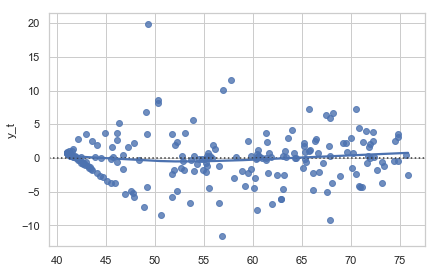

In [797]:
sns.set(style="whitegrid")

y_predict = rf2.predict(X)

# Plot the residuals after fitting a linear model
sns.residplot(y_predict, y, lowess=True, color="b")

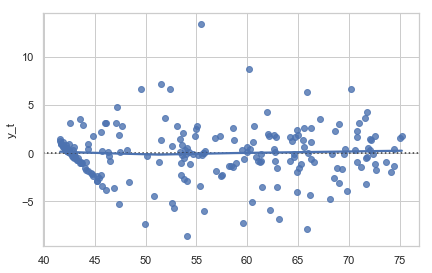

In [798]:
sns.set(style="whitegrid")

y_predict = gb2.predict(X)

# Plot the residuals after fitting a linear model
sns.residplot(y_predict, y, lowess=True, color="b")

In [799]:
scores = cross_val_score(rf2, X, y, cv=10, scoring='r2')
mse_scores = cross_val_score(rf2, X, y, cv=10, scoring='neg_mean_squared_error')
rmse = np.sqrt(-np.mean(mse_scores))

print("RF2 Scores -- Less Features")
print(np.mean(scores))
print(rmse)

RF2 Scores -- Less Features
0.7436207180150171
5.923716708904478


In [800]:
scores = cross_val_score(gb2, X, y, cv=10, scoring='r2')
mse_scores = cross_val_score(gb2, X, y, cv=10, scoring='neg_mean_squared_error')
rmse = np.sqrt(-np.mean(mse_scores))

print("GB2 Scores -- Less Features")
print(np.mean(scores))
print(rmse)

GB2 Scores -- Less Features
0.7271613458994758
6.003454736188912


   train_size  train_score  test_score
0          16     0.804370    0.581587
1          54     0.900532    0.735326
2          92     0.906571    0.742990
3         130     0.916094    0.753073
4         169     0.919948    0.759335


(-1, 1)

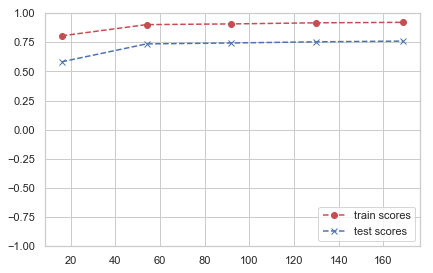

In [801]:
train_sizes, train_scores, test_scores = learning_curve(rf2, X, y, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.legend(loc='lower right')
plt.ylim(-1,1)

   train_size  train_score  test_score
0          16     0.817647    0.481121
1          54     0.941788    0.702140
2          92     0.944398    0.724219
3         130     0.949810    0.745916
4         169     0.948355    0.733517


(-1, 1)

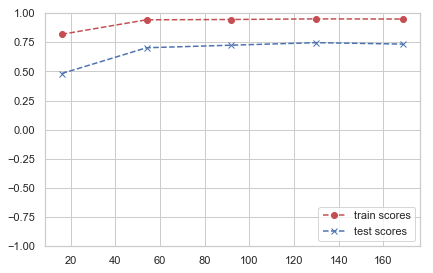

In [802]:
train_sizes, train_scores, test_scores = learning_curve(gb2, X, y, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test scores')
plt.legend(loc='lower right')
plt.ylim(-1,1)

In [803]:
feature_selection(rf2, X, y, len(X.columns))

,Feature Importances,Weights
0,Total_games_played_Scaled,0.781089
1,RBI_Scaled,0.075376
2,TB_Scaled,0.041403
3,Age_Scaled,0.031307
4,dWAR_Scaled,0.027970
5,OPS_Scaled,0.023193
6,rootASC_Scaled,0.014991
7,Second_Base,0.001429
8,Third_Base,0.001175
9,First_Base,0.000602


In [804]:
feature_selection(gb2, X, y, len(X.columns))

,Feature Importances,Weights
0,Total_games_played_Scaled,0.660570
1,Age_Scaled,0.088765
2,TB_Scaled,0.066354
3,RBI_Scaled,0.064881
4,dWAR_Scaled,0.044387
5,OPS_Scaled,0.042931
6,rootASC_Scaled,0.023275
7,Left_Field,0.003430
8,First_Base,0.002771
9,Second_Base,0.001194
